<a href="https://colab.research.google.com/github/he4tnix/multimedia_tasks/blob/main/Actividad_6/Actividad_6_ContrerasPatricio_207676861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [7]:
import librosa
import scipy.stats as ss
import numpy as np
import torch

#Se carga el archivo de audio
audio = "audio.wav"
y, sr = librosa.load(audio)

#Se calculan las caracteristicas indicadas iniciando por la media
media = np.mean(y) #Media

#Se implementa una función que use numpy para calcular kurtosis
def numpy_kurtosis(signal):
    n = len(signal)
    mean = np.mean(signal)
    std = np.std(signal)
    kurtosis = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * np.sum(((signal - mean) / std) ** 4) - (3 * (n - 1) ** 2 / ((n - 2) * (n - 3)))
    return kurtosis

#Se calcula kurtosis con la función creada
kurtosis = numpy_kurtosis(y)
#Se compara con la función existente de Scipy
Kurtosis_scipy = ss.kurtosis(y)

#Del mismo modo se implementa la función Skewness con numpy
def numpy_skewness(signal):
    n = len(signal)
    mean = np.mean(signal)
    std = np.std(signal)
    skewness = (1 / n) * np.sum(((signal - mean) / std) ** 3)
    return skewness

#Se calcula Skewness con la función creada
skewness = numpy_skewness(y)
#Se compara con el Skewness de Scipy
skewness_scipy = ss.skew(y)
#Se calcula el zero crossing rate
zcr = np.sum(librosa.zero_crossings(y)) / len(y)
#Se calcula el centroide espectral
sc = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
#Se calcula la energía de la señal
energia = np.sum(y**2)
#Se calcula el RMSE
rmse = np.sqrt(np.mean(librosa.feature.rms(y=y)))
#Se crea función para calcular frecuencia fundamental
def fundamental_freq(signal, sample_rate):
    # Se calcula la autocorrelación de la señal
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    # Se buscan el máximo y el mínimo
    diff = np.diff(autocorr)
    start = np.where(diff > 0)[0][0]
    peak = np.argmax(autocorr[start:]) + start

    # Se calculan los indices
    fundamental_freq = float(sample_rate) / peak
    return fundamental_freq
# Se calcula la frecuencia fundamental
ff = fundamental_freq(y,sr)
# Imprime los resultados
print("Media:", media)
print("Kurtosis:", kurtosis)
print("Kurtosis Scipy:", Kurtosis_scipy)
print("Skewness:", skewness)
print("Skewness Scipy:", skewness_scipy)
print("Zero Crossing Rate:", zcr)
print("Spectral Centroid:", sc)
print("Energía:", energia)
print("RMSE:", rmse)
print("Frecuencia Fundamental:", ff)


Media: -1.2262936e-05
Kurtosis: 2.1261977652250814
Kurtosis Scipy: 2.1261456406161647
Skewness: -0.05582110026228716
Skewness Scipy: -0.05582109350387825
Zero Crossing Rate: 0.16703991293245987
Spectral Centroid: 2323.9366300852903
Energía: 1199.9318
RMSE: 0.20565341
Frecuencia Fundamental: 3675.0


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


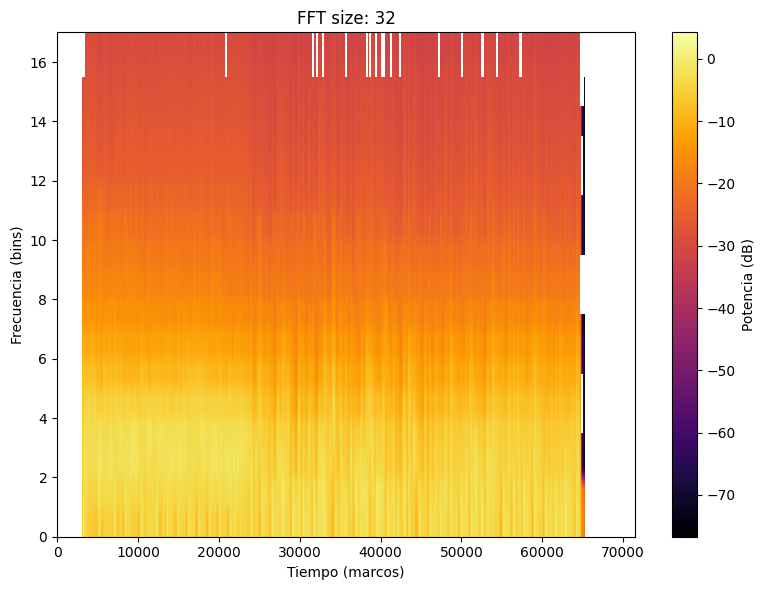

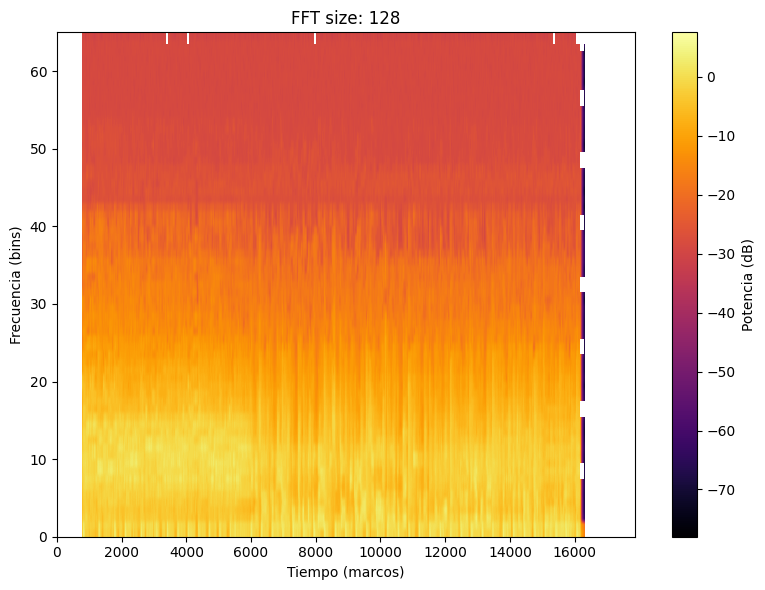

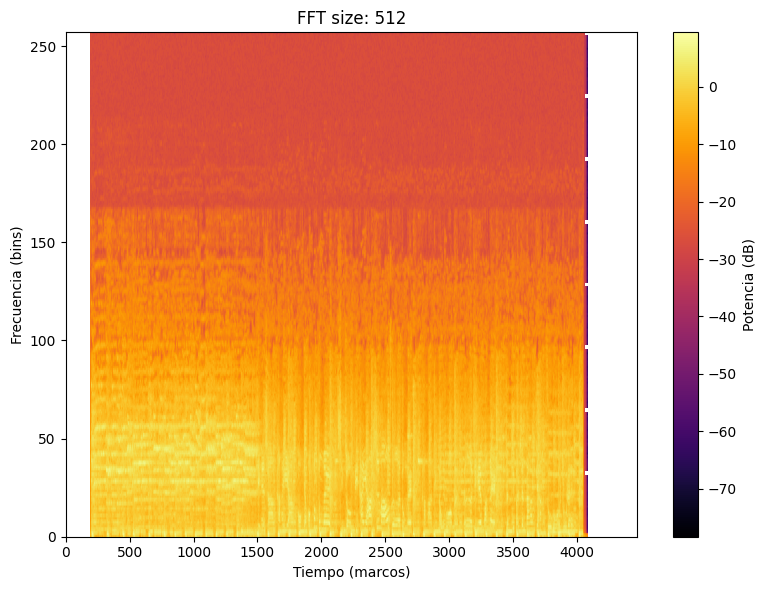

In [3]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Se carga el archivo de audio con Pytorchaudio
archivo = "audio.wav"
y, sr = torchaudio.load(archivo)

# Se crea un array con los tres valores de tamaño de la FFT
fft_sizes = [32, 128, 512]

# Calcular y visualizar el espectrograma para cada tamaño de FFT
for i, fft_size in enumerate(fft_sizes, 1):
    # Calcular el espectrograma
    spectrogram = torchaudio.transforms.Spectrogram(n_fft=fft_size)(y)

    # Obtener dimensiones
    num_channels, num_bins, num_frames = spectrogram.shape

    # Visualizar el espectrograma
    plt.figure(figsize=(8, 6))
    plt.imshow(spectrogram.log2()[0], cmap='inferno', aspect='auto', origin='lower', extent=[0, num_frames, 0, num_bins])
    plt.xlabel('Tiempo (marcos)')
    plt.ylabel('Frecuencia (bins)')
    plt.title(f'FFT size: {fft_size}')
    plt.colorbar(label='Potencia (dB)')
    plt.tight_layout()
    plt.show()

### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

In [ ]:
##Código en matlab

# %Se carga el archivo de audio
# [x, fs] = audioread('audio.wav');

# %Se diseña el efecto de reverberancia
# reverbEffect = reverberator('PreDelay', 0.05, 'WetDryMix', 0.5);

# %Se aplica el efecto de reverberancia
# y = reverbEffect(x);

# %Se graficó la señal original y la con reverberancia
# t = (0:length(x)-1) / fs;
# figure;
# subplot(2, 1, 1);
# plot(t, x);
# xlabel('Tiempo (s)');
# ylabel('Amplitud');
# title('Señal Original');
# subplot(2, 1, 2);
# plot(t, y);
# xlabel('Tiempo (s)');
# ylabel('Amplitud');
# title('Señal con Reverberancia');

# % Reproducir la señal con reverberancia
# sound(y, fs);


## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
